<a href="https://colab.research.google.com/github/kalraj/Data_analysis_on_restaurant_data/blob/master/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [53]:
#load the data from csv file to pandas dataframe
titanic=pd.read_csv("/content/sample_data/Titanic.csv")

In [54]:
#printing the first five rows of the dataframe for data over view
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
#numbers of rows and columns
titanic.shape

(891, 12)

In [56]:
#getting some information about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
#check the number of missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
#drop the "Cabin" column from the dataset
titanic=titanic.drop(columns="Cabin",axis=1)

In [60]:
#relacing the missing value in "Age " colun with mean values
titanic["Age"].fillna(titanic['Age'].mean(),inplace=True)

In [61]:
#fill the "Embarked" column with the most occurring value
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [62]:


titanic.isnull().sum()




PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [63]:
# quick review of statistical measure about data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
#finding number of people survived or not survived
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [131]:
#finding number of people traveling in each class
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [118]:
#finding number of male and female in dataset
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [127]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [133]:
titanic.groupby("Pclass")["Sex"].count()


Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64

In [116]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


# New Section

In [115]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Data Visualisation
categorial column = [survived,Pclass,Sex,Embarked]
numerical column=[age,fare]

In [ ]:
# univariate analysis


<Axes: xlabel='Sex', ylabel='count'>

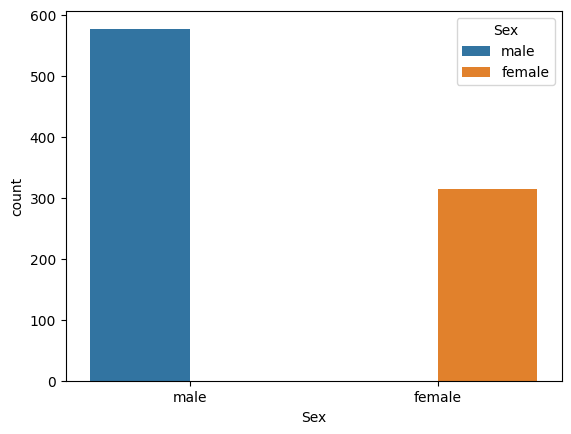

In [71]:
#making a count plot for "Survived " column
sns.countplot(x='Sex',data=titanic,hue="Sex")

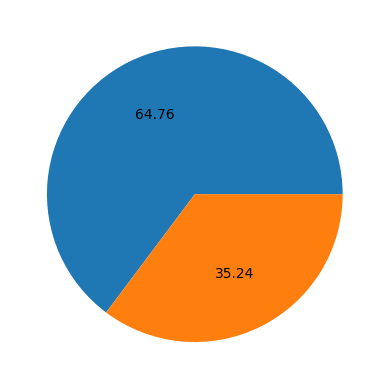

In [114]:
plt.pie(titanic["Sex"].value_counts(),autopct="%.2f")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

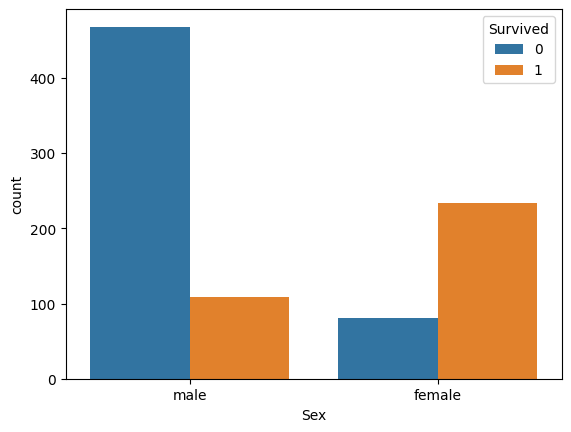

In [85]:
#number of survivors Gender Wise
sns.countplot(x="Sex",hue="Survived",data=titanic)


<Axes: xlabel='Pclass', ylabel='count'>

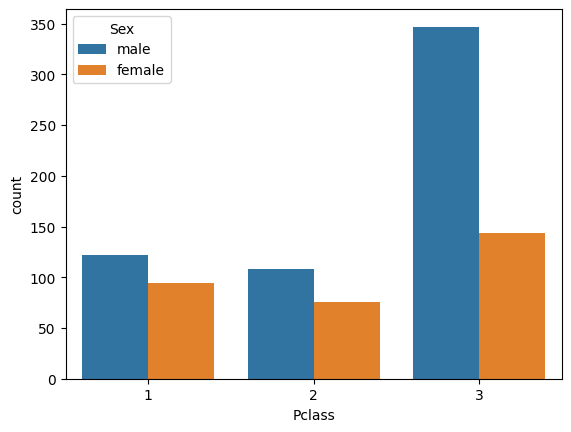

In [86]:
#make a count of male and female  for "Pclass " column
sns.countplot(x="Pclass",hue="Sex",data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

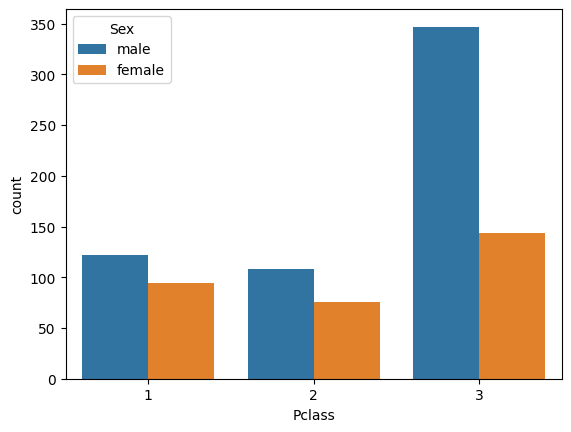

In [90]:
#number of survivors Pclass gender wise
sns.countplot(x="Pclass",hue="Sex",data=titanic)

<Axes: xlabel='Pclass', ylabel='Fare'>

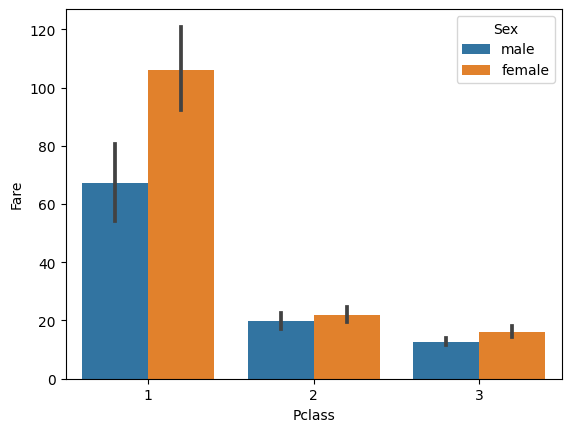

In [98]:
#fare price gender wise
sns.barplot(x="Pclass",y="Fare",hue="Sex",data=titanic)